In [4]:
import pandas as pd

In [18]:
def reshape_dataset(file_path, column_name):
    # Read without header
    df = pd.read_csv(file_path, header=None)
    
    # First row = years, second row = values
    years = df.iloc[0].tolist()
    values = df.iloc[1].tolist()
    
    # Create DataFrame in tidy format
    reshaped = pd.DataFrame({
        "Year": years,
        column_name: values
    })
    
    return reshaped

In [19]:
uem = reshape_dataset("UEM.csv", "Unemployment")
gdp = reshape_dataset("GDP.csv", "GDP_Million_USD")
literacy = reshape_dataset("Literacy.csv", "Literacy_Rate")
fdi = reshape_dataset("FDI.csv", "FDI_Percent_GDP")

# Merge them together
df = uem.merge(gdp, on="Year") \
        .merge(literacy, on="Year") \
        .merge(fdi, on="Year")

# Save final dataset
df.to_csv("Egypt_Economic_Data.csv", index=False)

print(df.head())


     Year  Unemployment  GDP_Million_USD  Literacy_Rate  FDI_Percent_GDP
0  1991.0          9.38     37387.836491           44.0         0.676691
1  1992.0          8.92     41855.986519           44.0         1.096617
2  1993.0         10.92     46578.631453           44.0         1.058425
3  1994.0         10.93     51897.983393           44.0         2.420133
4  1995.0         11.04     60159.245060           44.0         0.994028


In [20]:
df = pd.read_csv("Egypt_Economic_Data.csv")


In [21]:
def flag_unemployment(value):
    if value >= 12:
        return "High"
    elif value >= 8:
        return "Medium"
    else:
        return "Low"

In [25]:
df["Year"] = df["Year"].astype(int)
df["Unemployment_Flag"] = df["Unemployment"].apply(flag_unemployment)
df.to_csv("Egypt_Economic_Data_Flagged.csv", index=False)
print(df.head(15))


    Year  Unemployment  GDP_Million_USD  Literacy_Rate  FDI_Percent_GDP  \
0   1991         9.380     37387.836491           44.0         0.676691   
1   1992         8.920     41855.986519           44.0         1.096617   
2   1993        10.920     46578.631453           44.0         1.058425   
3   1994        10.930     51897.983393           44.0         2.420133   
4   1995        11.040     60159.245060           44.0         0.994028   
5   1996         9.000     67629.716981           56.0         0.940415   
6   1997         8.370     78436.578171           56.0         1.135376   
7   1998         8.030     84828.807556           56.0         1.268437   
8   1999         7.950     90710.704807           56.0         1.174393   
9   2000         8.980     99838.543960           56.0         1.236997   
10  2001         9.260     96684.636119           56.0         0.527385   
11  2002        10.010     85146.067416           56.0         0.759753   
12  2003        10.910   

In [34]:
# Convert FDI from % of GDP to Million US$
df["FDI_Million_USD"] = (df["FDI_Percent_GDP"] ) * df["GDP_Million_USD"]

# Drop old FDI column
df = df.drop(columns=["FDI_Percent_GDP"])

# Save updated dataset
df.to_csv("Egypt_Economic_Data_FDI_Million.csv", index=False)

print(df.head())

KeyError: 'FDI_Percent_GDP'

In [27]:
pip install matplot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.7/109.7 kB 862.8 kB/s eta 0:00:00a 0:00:01
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached websocket_client-1.8.0-py3-none-any.whl.metadata (8.0 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 775.3 kB/s eta 0:00:00 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached requests-2.32.5-py3-none-any.whl.metadata (4.9 kB)
  Using cached urllib3-2.5.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached charset_normalizer-3.4.3-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.manylinux_2_28_x86_64.whl.metadata (36 kB)
  Using c

In [28]:
import matplotlib.pyplot as plt

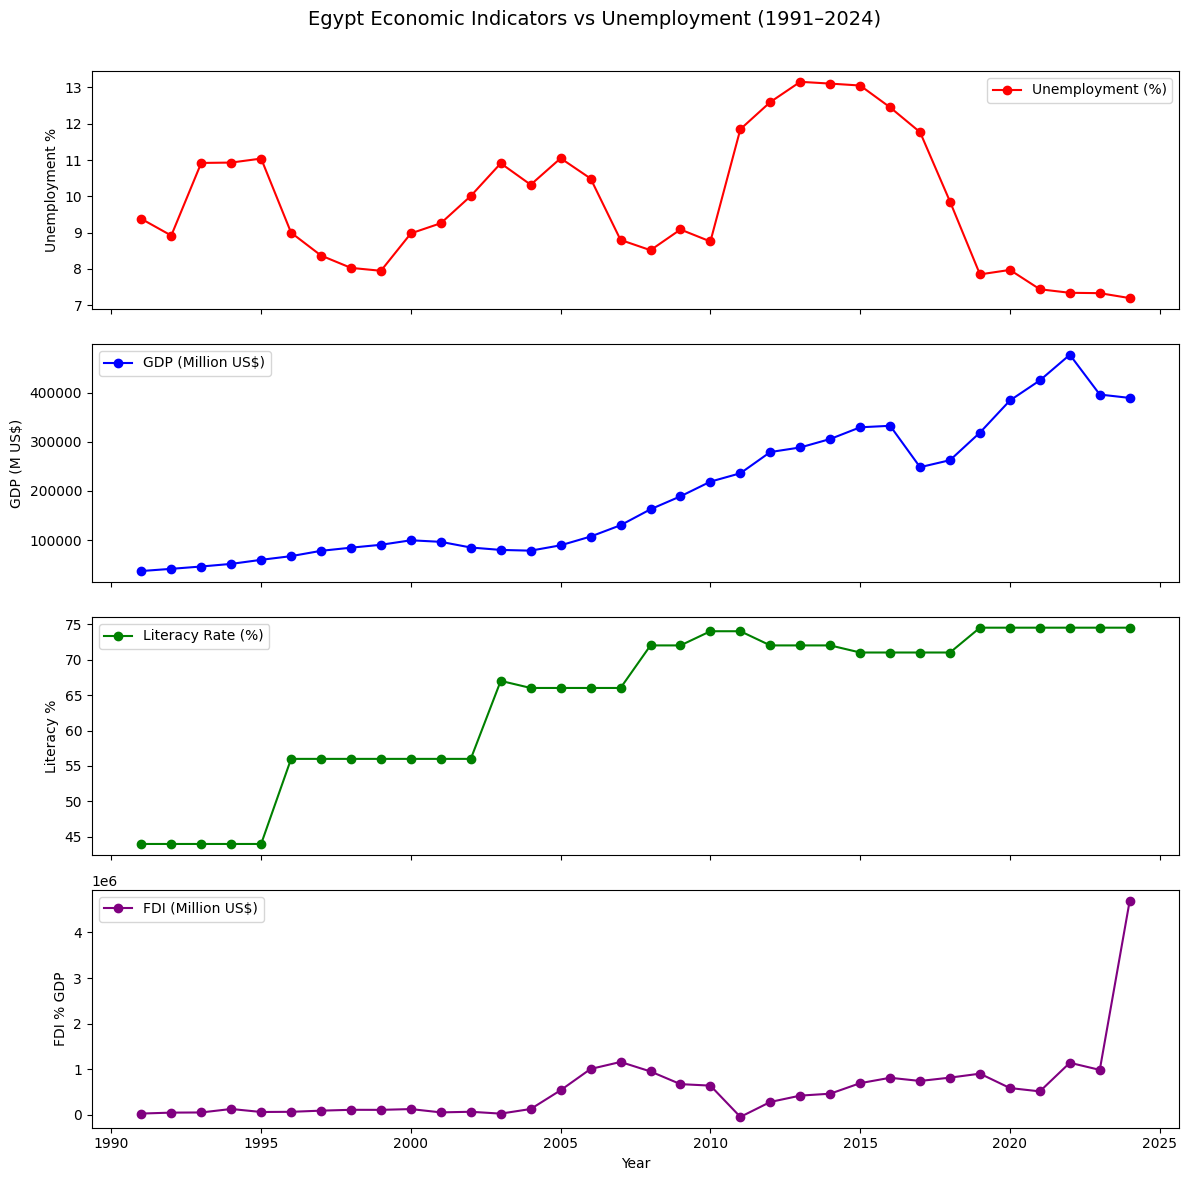

In [38]:
df = pd.read_csv("Egypt_Economic_Data_FDI_Million.csv")
fig, axes = plt.subplots(4, 1, figsize=(12, 12), sharex=True)
# Unemployment
axes[0].plot(df["Year"], df["Unemployment"], marker="o", color="red", label="Unemployment (%)")
axes[0].set_ylabel("Unemployment %")
axes[0].legend()

# GDP
axes[1].plot(df["Year"], df["GDP_Million_USD"], marker="o", color="blue", label="GDP (Million US$)")
axes[1].set_ylabel("GDP (M US$)")
axes[1].legend()

# Literacy Rate
axes[2].plot(df["Year"], df["Literacy_Rate"], marker="o", color="green", label="Literacy Rate (%)")
axes[2].set_ylabel("Literacy %")
axes[2].legend()

# FDI
axes[3].plot(df["Year"], df["FDI_Million_USD"], marker="o", color="purple", label="FDI (Million US$)")
axes[3].set_ylabel("FDI % GDP")
axes[3].set_xlabel("Year")
axes[3].legend()

plt.suptitle("Egypt Economic Indicators vs Unemployment (1991–2024)", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()



In [40]:
# Load final dataset
fact = pd.read_csv("Egypt_Economic_Data_FDI_Million.csv")

# --- Dim_Year
dim_year = fact[["Year"]].drop_duplicates().reset_index(drop=True)
dim_year["Year_ID"] = range(1, len(dim_year) + 1)

# --- Dim_Flag
dim_flag = (
    fact[["Unemployment_Flag"]]
    .drop_duplicates()
    .reset_index(drop=True)
)
dim_flag["Flag_ID"] = range(1, len(dim_flag) + 1)
dim_flag["Description"] = dim_flag["Unemployment_Flag"].map({
    "High": "Unemployment rate >= 12%",
    "Medium": "Unemployment rate between 8% and 12%",
    "Low": "Unemployment rate < 8%"
})

# --- Fact_EconomicIndicators
fact_table = (
    fact.merge(dim_year, on="Year", how="left")
        .merge(dim_flag, left_on="Unemployment_Flag", right_on="Unemployment_Flag", how="left")
)

fact_table = fact_table[[
    "Year_ID",
    "Unemployment",
    "Flag_ID",
    "GDP_Million_USD",
    "Literacy_Rate",
    "FDI_Million_USD"
]].copy()

fact_table.insert(0, "Fact_ID", range(1, len(fact_table) + 1))

# Save to CSV
dim_year.to_csv("Dim_Year.csv", index=False)
dim_flag.to_csv("Dim_Flag.csv", index=False)
fact_table.to_csv("Fact_EconomicIndicators.csv", index=False)